# House Prices: Advanced Regression Techniques

Target: Predict the sales price for each house.

Source: https://www.kaggle.com/c/house-prices-advanced-regression-techniques#description

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from ml_metrics import rmse
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import learning_curve
import xgboost as xgb
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from functools import partial
from sklearn.metrics import make_scorer
import lightgbm as lgb
import catboost as ctb

In [2]:
np.random.seed(2018)

In [3]:
# display data
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_row', 1500)

In [4]:
# load data
df_train = pd.read_csv('input/train.csv')
df_test = pd.read_csv('input/test.csv')
df_test['SalePrice'] = 0

### Data description
    
   - SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
   - MSSubClass: The building class
   - MSZoning: The general zoning classification
   - LotFrontage: Linear feet of street connected to property
   - LotArea: Lot size in square feet
   - Street: Type of road access
   - Alley: Type of alley access
   - LotShape: General shape of property
   - LandContour: Flatness of the property
   - Utilities: Type of utilities available
   - LotConfig: Lot configuration
   - LandSlope: Slope of property
   - Neighborhood: Physical locations within Ames city limits
   - Condition1: Proximity to main road or railroad
   - Condition2: Proximity to main road or railroad (if a second is present)
   - BldgType: Type of dwelling
   - HouseStyle: Style of dwelling
   - OverallQual: Overall material and finish quality
   - OverallCond: Overall condition rating
   - YearBuilt: Original construction date
   - YearRemodAdd: Remodel date
   - RoofStyle: Type of roof
   - RoofMatl: Roof material
   - Exterior1st: Exterior covering on house
   - Exterior2nd: Exterior covering on house (if more than one material)
   - MasVnrType: Masonry veneer type
   - MasVnrArea: Masonry veneer area in square feet
   - ExterQual: Exterior material quality
   - ExterCond: Present condition of the material on the exterior
   - Foundation: Type of foundation
   - BsmtQual: Height of the basement
   - BsmtCond: General condition of the basement
   - BsmtExposure: Walkout or garden level basement walls
   - BsmtFinType1: Quality of basement finished area
   - BsmtFinSF1: Type 1 finished square feet
   - BsmtFinType2: Quality of second finished area (if present)
   - BsmtFinSF2: Type 2 finished square feet
   - BsmtUnfSF: Unfinished square feet of basement area
   - TotalBsmtSF: Total square feet of basement area
   - Heating: Type of heating
   - HeatingQC: Heating quality and condition
   - CentralAir: Central air conditioning
   - Electrical: Electrical system
   - 1stFlrSF: First Floor square feet
   - 2ndFlrSF: Second floor square feet
   - LowQualFinSF: Low quality finished square feet (all floors)
   - GrLivArea: Above grade (ground) living area square feet
   - BsmtFullBath: Basement full bathrooms
   - BsmtHalfBath: Basement half bathrooms
   - FullBath: Full bathrooms above grade
   - HalfBath: Half baths above grade
   - Bedroom: Number of bedrooms above basement level
   - Kitchen: Number of kitchens
   - KitchenQual: Kitchen quality
   - TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
   - Functional: Home functionality rating
   - Fireplaces: Number of fireplaces
   - FireplaceQu: Fireplace quality
   - GarageType: Garage location
   - GarageYrBlt: Year garage was built
   - GarageFinish: Interior finish of the garage
   - GarageCars: Size of garage in car capacity
   - GarageArea: Size of garage in square feet
   - GarageQual: Garage quality
   - GarageCond: Garage condition
   - PavedDrive: Paved driveway
   - WoodDeckSF: Wood deck area in square feet
   - OpenPorchSF: Open porch area in square feet
   - EnclosedPorch: Enclosed porch area in square feet
   - 3SsnPorch: Three season porch area in square feet
   - ScreenPorch: Screen porch area in square feet
   - PoolArea: Pool area in square feet
   - PoolQC: Pool quality
   - Fence: Fence quality
   - MiscFeature: Miscellaneous feature not covered in other categories
   - MiscVal: $Value of miscellaneous feature
   - MoSold: Month Sold
   - YrSold: Year Sold
   - SaleType: Type of sale
   - SaleCondition: Condition of sale


### Info about data

I used following function in orger to get some important info about data:

    - info(): some help information
    - shape: method, which describe shape of dataset
    - describe(): compte descriptive statistics
    - nunique():  number of unique elements
    - isnull(): search missing value
    - sample(n): return n random row
    - corr(): compute correlation between columns

In [5]:
df_train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [7]:
# delete Id variable, because it is unnecessary in compute
df_train = df_train.drop(['Id'], axis = 1)

In [8]:
df_train.shape

(1460, 80)

In [9]:
df_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [10]:
df_train.nunique()

MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
Alley               2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        637
BsmtFinType2        6
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          753
2ndFlrSF          417
LowQualFinSF       24
GrLivArea 

In [11]:
df_train.isnull().any().any()

True

In [12]:
def missing_values(df):
    for column in df.columns:
        null_rows = df[column].isnull()
        if null_rows.any() == True:
            print('%s: %d nulls' % (column, null_rows.sum()))

In [13]:
missing_values(df_train)

LotFrontage: 259 nulls
Alley: 1369 nulls
MasVnrType: 8 nulls
MasVnrArea: 8 nulls
BsmtQual: 37 nulls
BsmtCond: 37 nulls
BsmtExposure: 38 nulls
BsmtFinType1: 37 nulls
BsmtFinType2: 38 nulls
Electrical: 1 nulls
FireplaceQu: 690 nulls
GarageType: 81 nulls
GarageYrBlt: 81 nulls
GarageFinish: 81 nulls
GarageQual: 81 nulls
GarageCond: 81 nulls
PoolQC: 1453 nulls
Fence: 1179 nulls
MiscFeature: 1406 nulls


In [14]:
df_train.sample(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
353,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,6,8,1928,2003,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,BrkTil,TA,TA,No,Unf,0,Unf,0,624,624,GasA,Gd,Y,SBrkr,720,0,0,720,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,2005.0,Unf,2,484,TA,TA,Y,106,0,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,105900
92,30,RL,80.0,13360,Pave,Grvl,IR1,HLS,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,1Story,5,7,1921,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,Gd,BrkTil,Gd,TA,No,ALQ,713,Unf,0,163,876,GasA,Ex,Y,SBrkr,964,0,0,964,1,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1921.0,Unf,2,432,TA,TA,Y,0,0,44,0,0,0,NaN,NaN,NaN,0,8,2009,WD,Normal,163500
1010,50,RL,115.0,21286,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1.5Fin,5,5,1948,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,720,720,GasA,TA,Y,SBrkr,720,551,0,1271,0,0,2,0,4,1,TA,7,Typ,1,Gd,Attchd,1948.0,Unf,1,312,TA,TA,Y,0,0,108,0,0,0,NaN,NaN,NaN,0,8,2008,WD,Normal,135000
96,20,RL,78.0,10264,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,1999,1999,Gable,CompShg,VinylSd,VinylSd,BrkFace,183.0,Gd,TA,PConc,Gd,TA,Av,ALQ,1162,Unf,0,426,1588,GasA,Ex,Y,SBrkr,1588,0,0,1588,0,0,2,0,3,1,Gd,6,Typ,0,NaN,Attchd,1999.0,RFn,2,472,TA,TA,Y,158,29,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD,Normal,214000
1177,50,RM,NaN,3950,Pave,Grvl,Reg,Bnk,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,6,8,1926,2004,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468,Unf,0,350,818,GasA,TA,Y,SBrkr,818,406,0,1224,0,0,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1926.0,Unf,1,210,TA,TA,N,0,0,116,0,0,0,NaN,NaN,NaN,0,12,2009,WD,Normal,115000


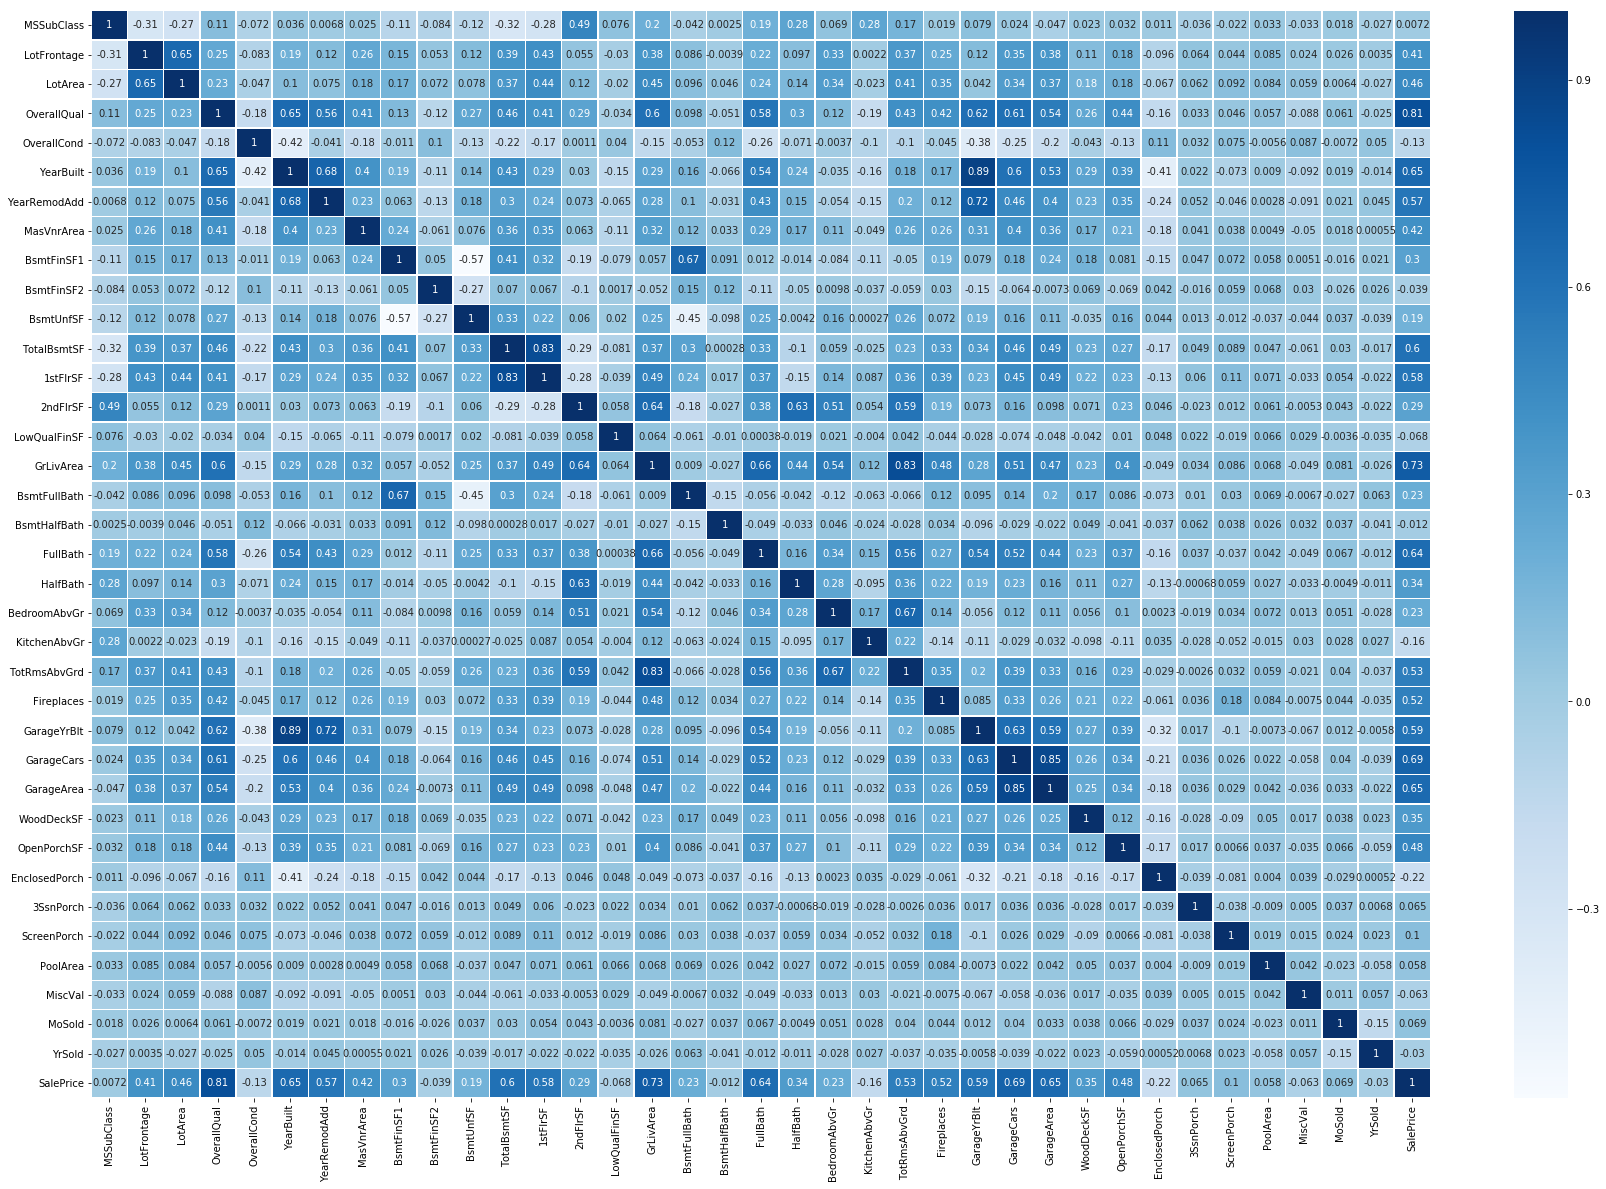

In [15]:
plt.rcParams['figure.figsize']=(30,20)
sns.heatmap(df_train.corr(method='spearman'), annot=True, linewidths=.5, cmap="Blues");

In [16]:
# five most correlation variable with 'SalePrice'
corr = df_train.corr()
corr['SalePrice'].sort_values(ascending = False)[1:6]

OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
TotalBsmtSF    0.613581
Name: SalePrice, dtype: float64

In [17]:
corr['SalePrice'].sort_values(ascending = False)[-5:]

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

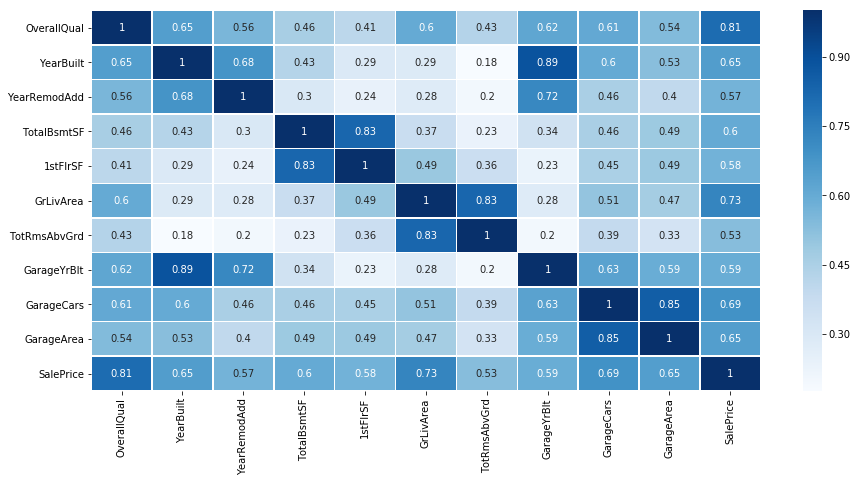

In [18]:
# get correlation matrix, where correlation value is greater than 70%
corr_matrix = df_train.corr(method='spearman')
corr_columns = corr_matrix[corr_matrix[corr_matrix > 0.7] < 1.0].any()
corr_matrix = corr_matrix[corr_columns][corr_columns.index[corr_columns]]
plt.rcParams['figure.figsize']=(15,7)
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap="Blues");

In [19]:
print(df_train.SalePrice.skew())
# A skewness value > 0 means, that there is more weight in the left tail of the distribution.

1.8828757597682129


### Visualisation

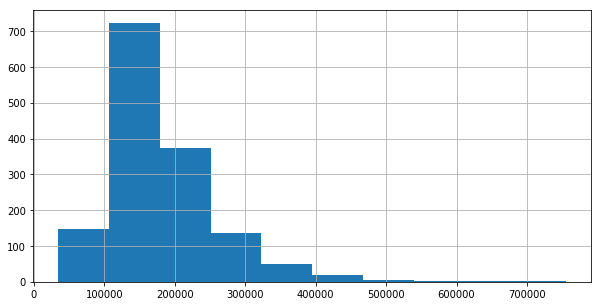

In [20]:
# target variable
plt.rcParams['figure.figsize']=(10,5)
df_train['SalePrice'].hist();

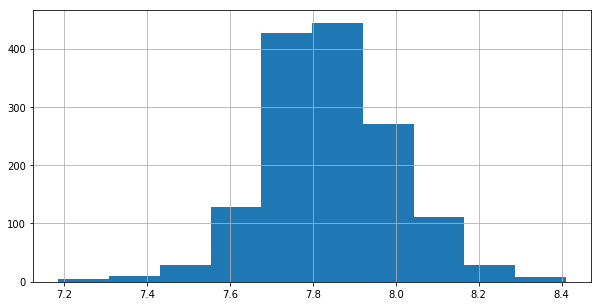

In [21]:
df_train['SalePrice_bc'], _ = stats.boxcox(df_train['SalePrice'])
df_train['SalePrice_bc'].hist();

In [22]:
df_train['SalePrice_log'] = np.log2( df_train['SalePrice'] + 1)

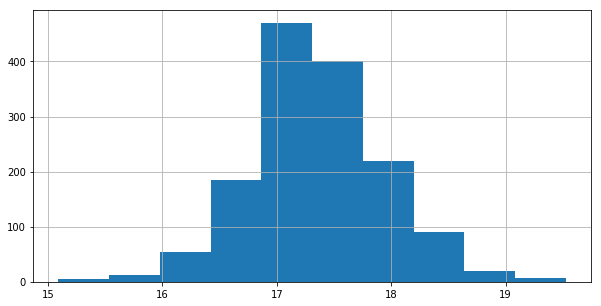

In [23]:
df_train['SalePrice_log'].hist();

In [24]:
print(np.log2(df_train.SalePrice).skew())
# Normally distributed data, the skewness should be about 0

0.12133506220521352


The varable 'SalePrice' have skewed distribution, so I need transforn this variable, because Linear Regresin require it. I used log2. Also I tried use boxcox in order to comparison two transforn function.
After I used log2 or boxcox I get normalize distribution.

In [25]:
def good_feats(df):
    feats_from_df = set(df.select_dtypes([np.int]).columns.values)
    bad_feats = {'SalePrice', 'SalePrice_bc'}
    return list(feats_from_df - bad_feats)

In [26]:
def make_hist(df):
    feats = good_feats(df)
    for index, feat in enumerate(feats):
        plt.subplot(len(feats)/5+1, 5, index+1);
        plt.title(feat);
        df[feat].hist();

In [27]:
def make_scatter(df):
    feats = good_feats(df)
    for index, feat in enumerate(feats):
        plt.subplot(len(feats)/5+1, 5, index+1)
        sns.regplot(x=feat, y='SalePrice', data=df_train)

In [28]:
def make_bar(df):
    cat_feats = df_train.select_dtypes(exclude = [np.int, np.float]).columns.values
    cat_feats = cat_feats[:-1]
    for index, feat in enumerate(cat_feats):
        plt.subplot(len(cat_feats)/5+1, 5, index+1)
        sns.barplot(x=feat, y='SalePrice', data=df_train, palette="PRGn");
        plt.xticks(rotation=90);

CPU times: user 616 ms, sys: 24.8 ms, total: 640 ms
Wall time: 620 ms


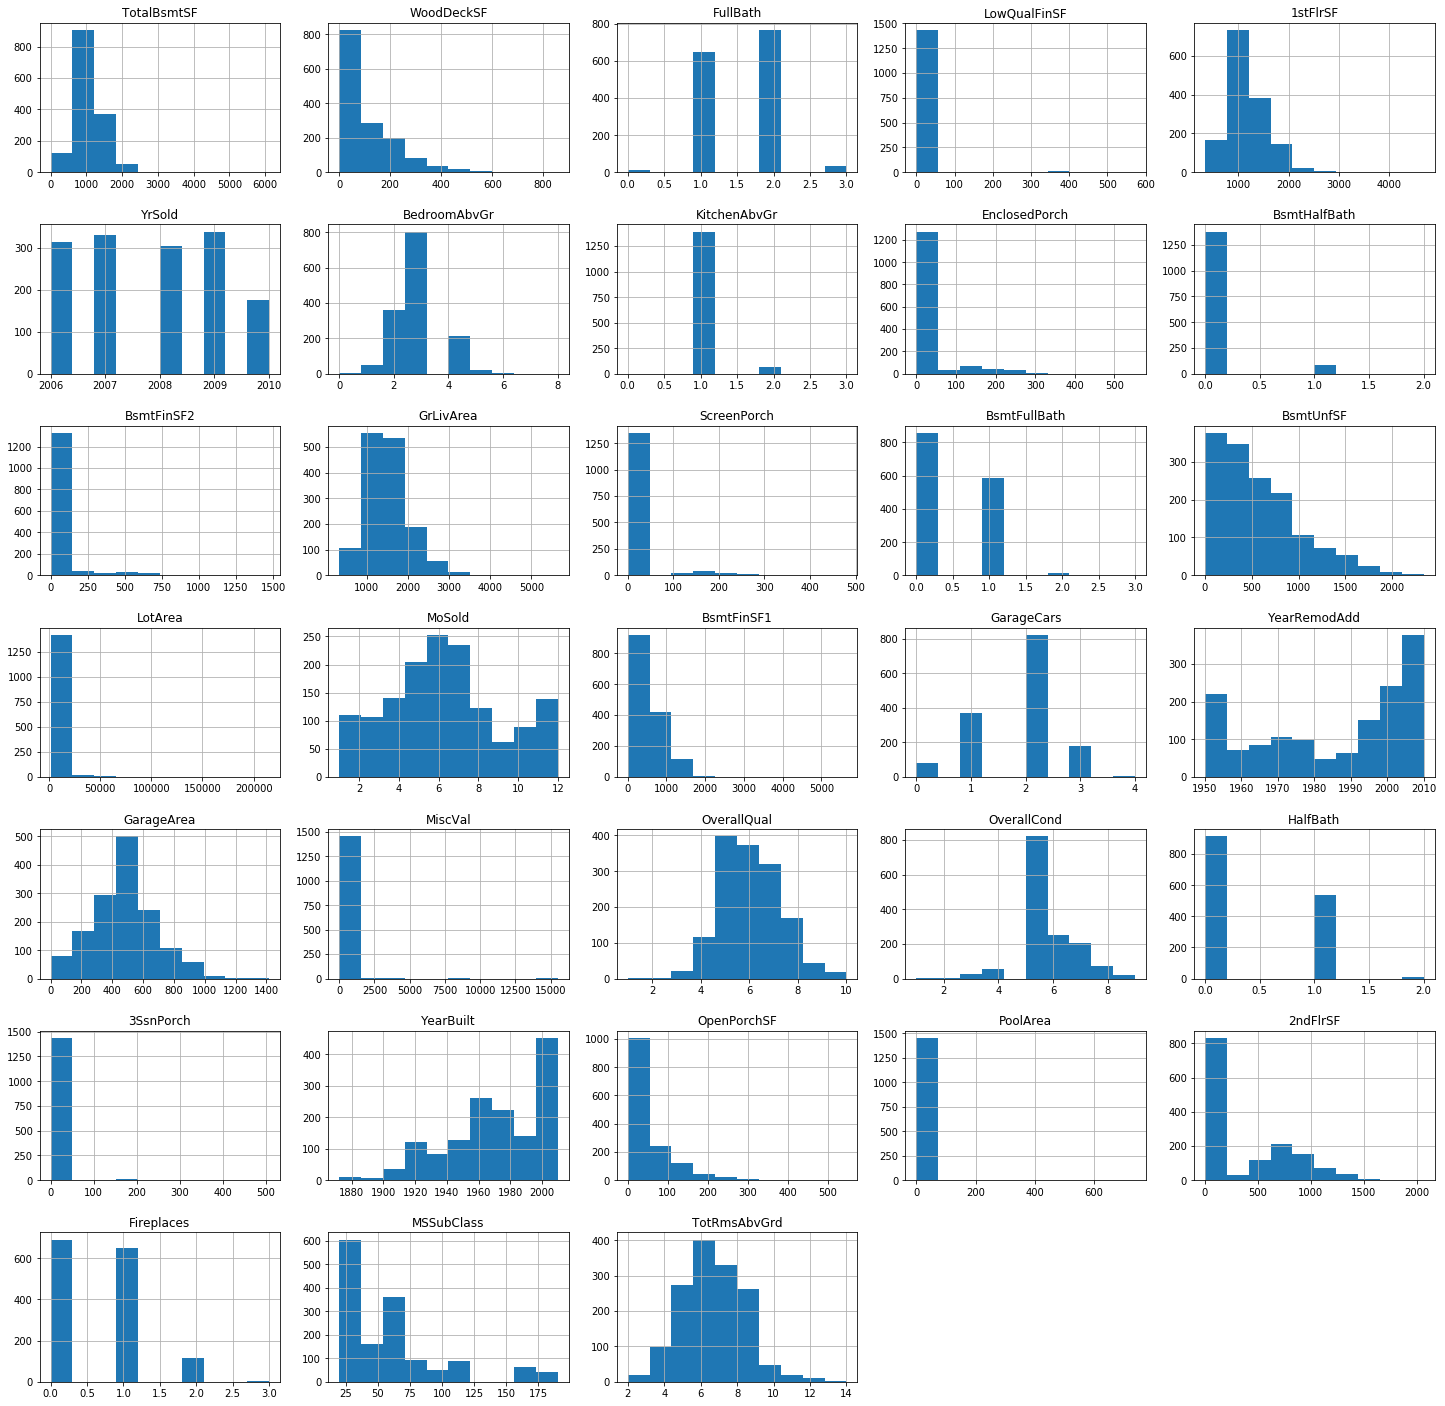

In [29]:
%%time
plt.figure(figsize=(25,25));
plt.subplots_adjust(hspace = 0.35);

make_hist(df_train)

CPU times: user 7.41 s, sys: 4.06 s, total: 11.5 s
Wall time: 6.4 s


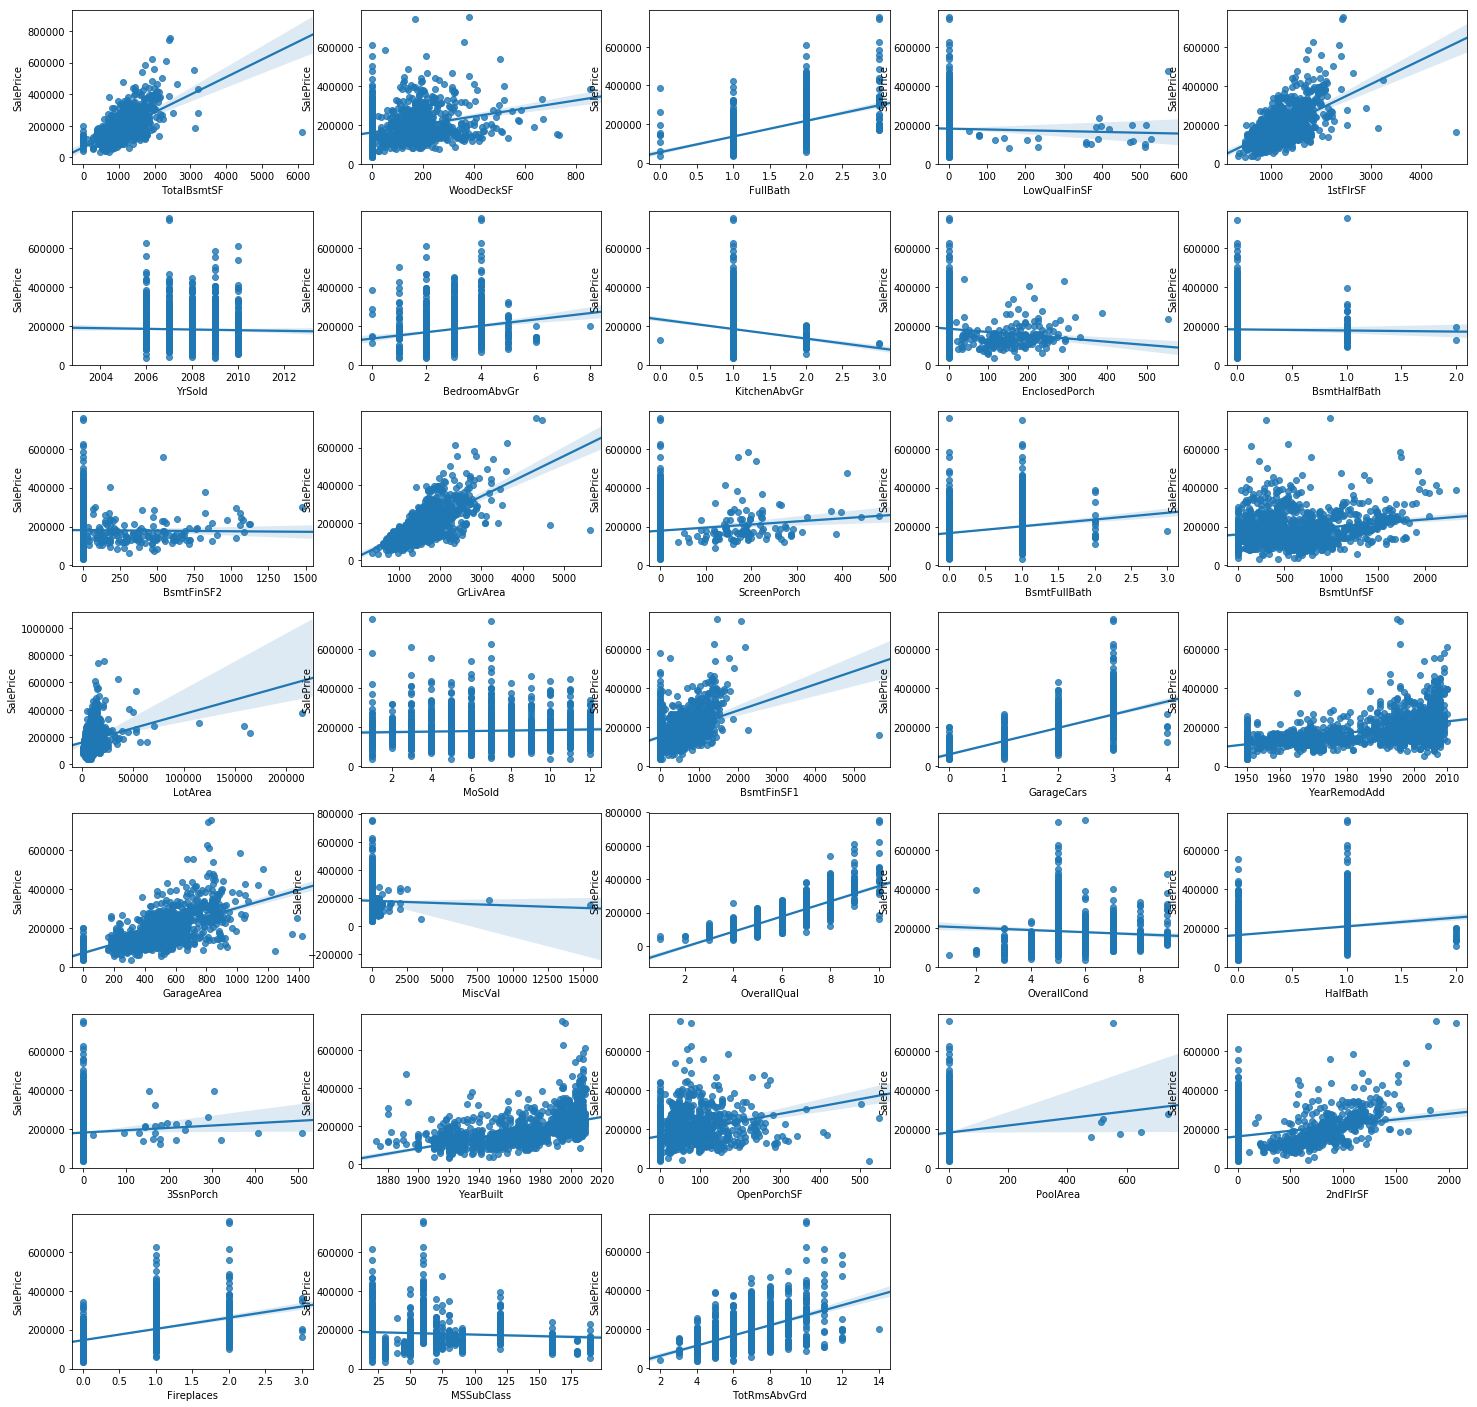

In [30]:
%%time
plt.figure(figsize=(25,25))
plt.subplots_adjust(hspace = 0.3)

make_scatter(df_train)

CPU times: user 8.23 s, sys: 5.77 ms, total: 8.24 s
Wall time: 8.23 s


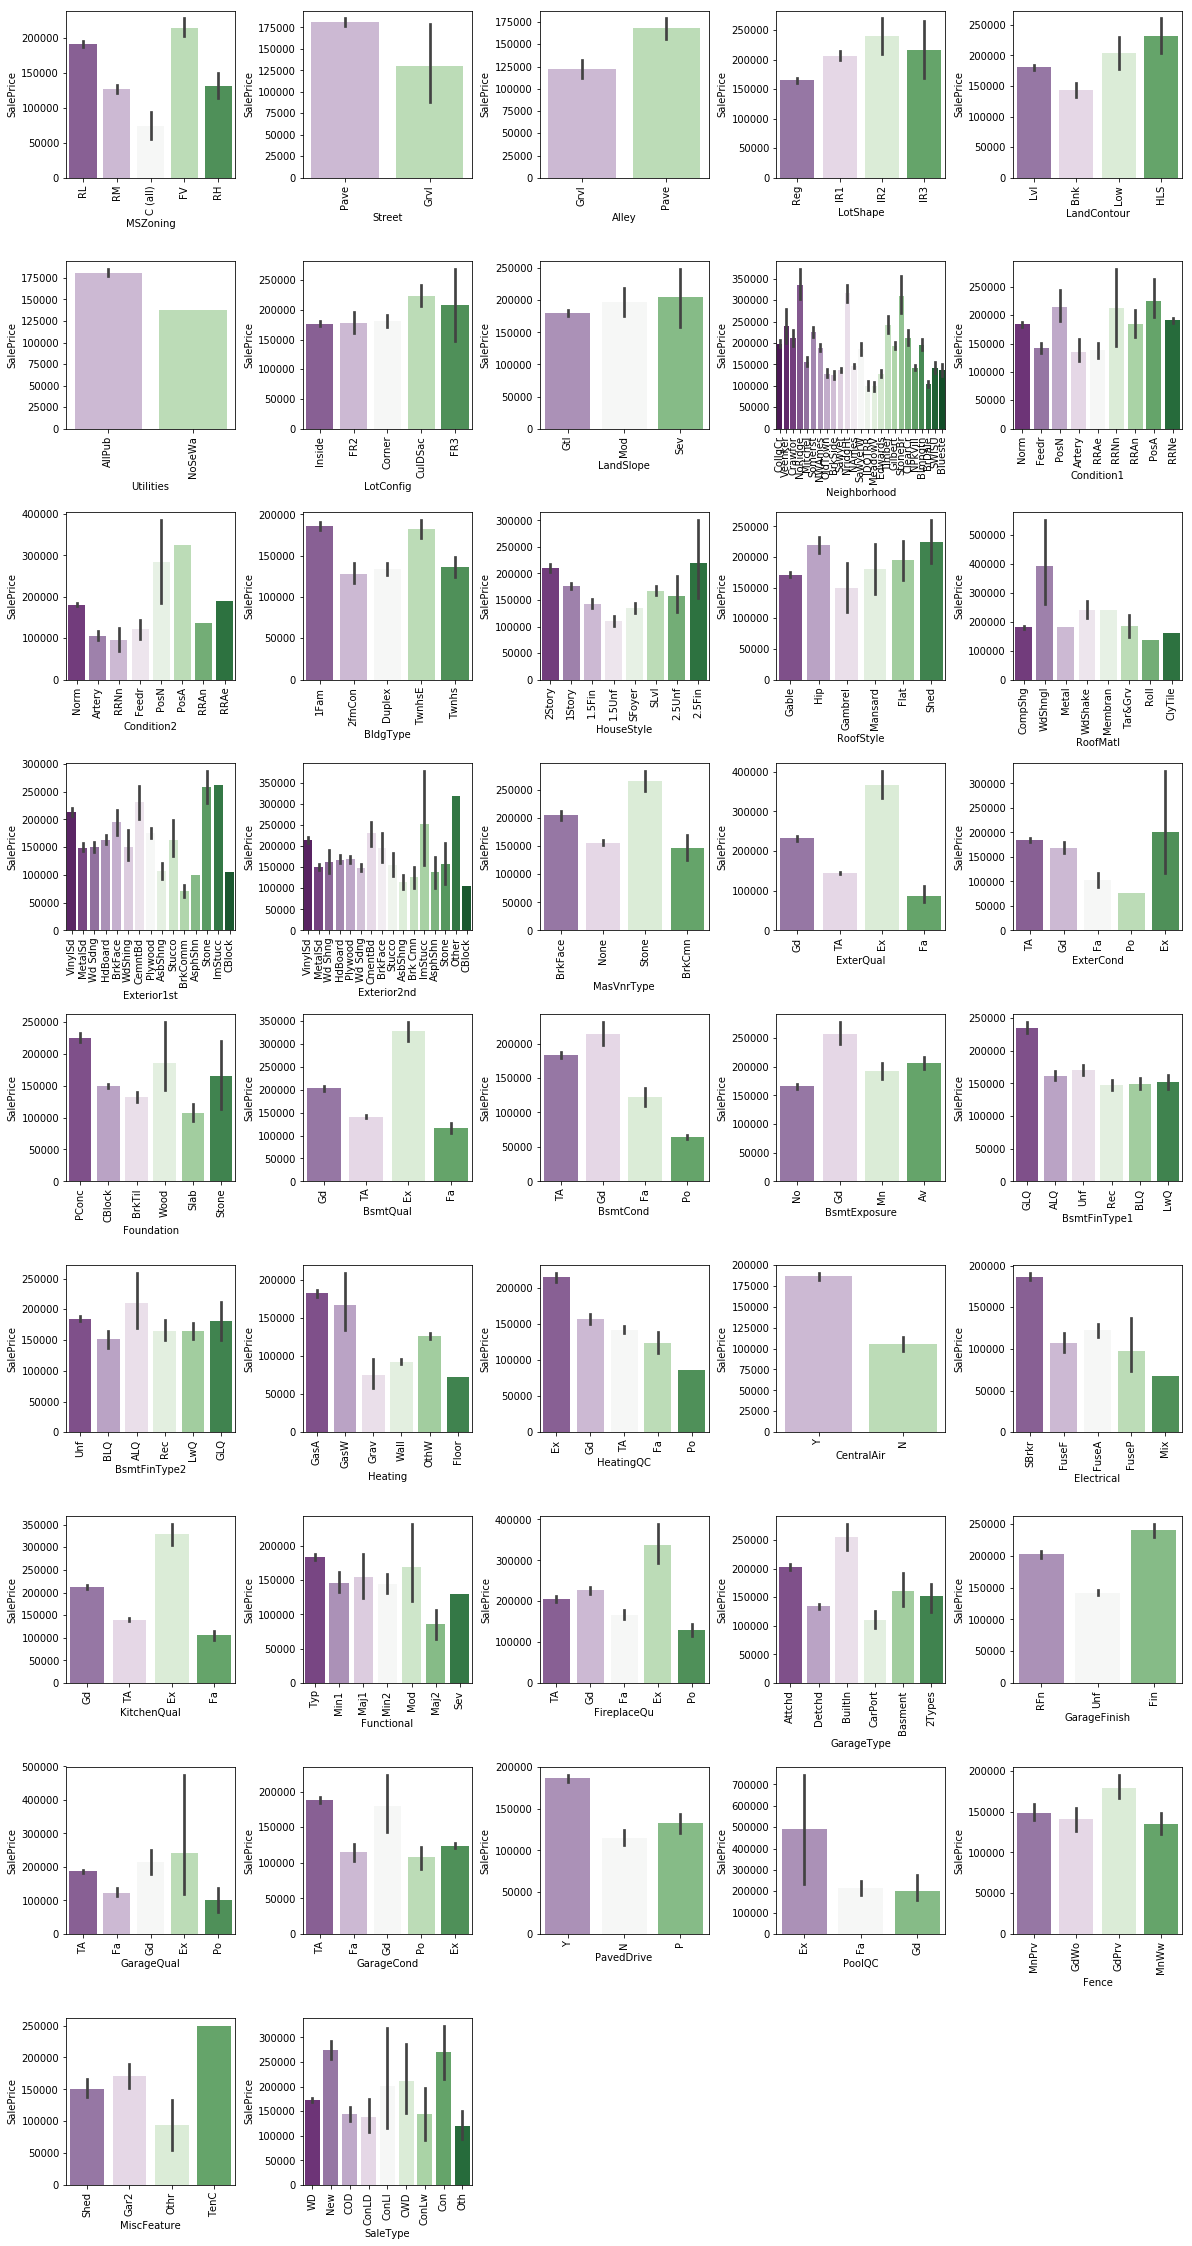

In [31]:
%%time
plt.figure(figsize=(20,40))
plt.subplots_adjust(hspace = 0.5, wspace = 0.4)

make_bar(df_train)

In [32]:
df_train.Neighborhood.head(10)

0    CollgCr
1    Veenker
2    CollgCr
3    Crawfor
4    NoRidge
5    Mitchel
6    Somerst
7     NWAmes
8    OldTown
9    BrkSide
Name: Neighborhood, dtype: object

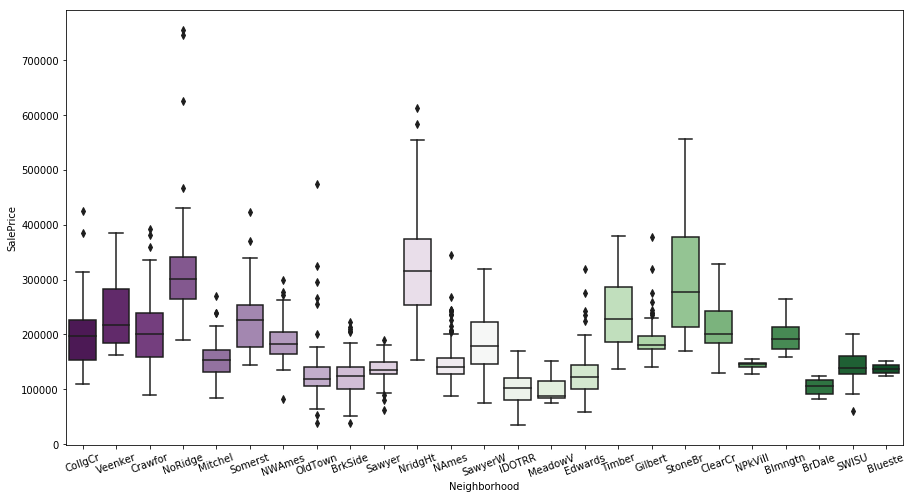

In [33]:
plt.rcParams['figure.figsize']=(15,8)
sns.boxplot(x='Neighborhood', y='SalePrice', data=df_train, palette="PRGn");
plt.xticks(rotation=20);

### Fix NaN variable

In [34]:
missing_values(df_train)

LotFrontage: 259 nulls
Alley: 1369 nulls
MasVnrType: 8 nulls
MasVnrArea: 8 nulls
BsmtQual: 37 nulls
BsmtCond: 37 nulls
BsmtExposure: 38 nulls
BsmtFinType1: 37 nulls
BsmtFinType2: 38 nulls
Electrical: 1 nulls
FireplaceQu: 690 nulls
GarageType: 81 nulls
GarageYrBlt: 81 nulls
GarageFinish: 81 nulls
GarageQual: 81 nulls
GarageCond: 81 nulls
PoolQC: 1453 nulls
Fence: 1179 nulls
MiscFeature: 1406 nulls


In [35]:
df_train['LotFrontage'].head(5)

0    65.0
1    80.0
2    68.0
3    60.0
4    84.0
Name: LotFrontage, dtype: float64

In [36]:
LFbyN = df_train.groupby('Neighborhood')['LotFrontage'].median().to_dict()
df_train['LotFrontage'] = df_train.apply(lambda row: LFbyN[row['Neighborhood']]
                                                    if pd.isnull(row['LotFrontage'])
                                                    else row['LotFrontage'], axis = 1)

In [37]:
df_train['Electrical'] = df_train['Electrical'].fillna('SBrkr')

In [38]:
cats_nan = ['Alley', 'PoolQC', 'MiscFeature', 'Fence', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure',  'BsmtFinType1', 'BsmtFinType1', 'BsmtFinType2', 'GarageYrBlt']
for cat in cats_nan:
    df_train[cat] = df_train[cat].fillna("None")

In [39]:
missing_values(df_train)

### Transform categorial variable

In [40]:
cat_feats = df_train.select_dtypes(exclude = [np.number]).columns.values
cat_feats

array(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'], dtype=object)

In [41]:
def factorize(df, *columns):
    feats = set(df.select_dtypes(exclude = [np.int, np.float]).columns.values)
    for column in feats:
        df[column + '_cat'] = pd.factorize(df[column])[0]

In [42]:
#factorize(df_train)

In [43]:
#df_train = df_train.select_dtypes(include=[np.number]).interpolate().dropna()
#df_train.head(5)

In [44]:
#df_train.sample(5)

### Basic model

In [45]:
def model_train_predict(model, X, y, success_metric=rmse):
    print('split')
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    print('fit')
    model.fit(X_train, y_train)
    print('pred')
    y_pred = model.predict(X_test)
    return success_metric(y_test, y_pred)

In [46]:
X = df_train[good_feats(df_train)].values
y = df_train['SalePrice']

In [47]:
model_train_predict(LinearRegression(), X, y)

split
fit
pred


30535.92391789149

### Feature engineering

To feature engineering I choose feature based on correlation and visualisation. These are: OverallQual, GrLivArea, GarageCars, GarageArea, YearRemodeAdd, TotalBsmtSF, 1stFirSF, FullBath, TotRmsAbvGrd, YearBuilt, Street, SalesCondition, BsmtQual, KitchenQual, CentralAir, RoofMatl.

In [48]:
# the most correlaated variable with target
df_train.OverallQual.isnull().any()

False

In [49]:
df_train.OverallQual.nunique()

10

In [50]:
df_train.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

In [51]:
df_train.OverallQual.value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

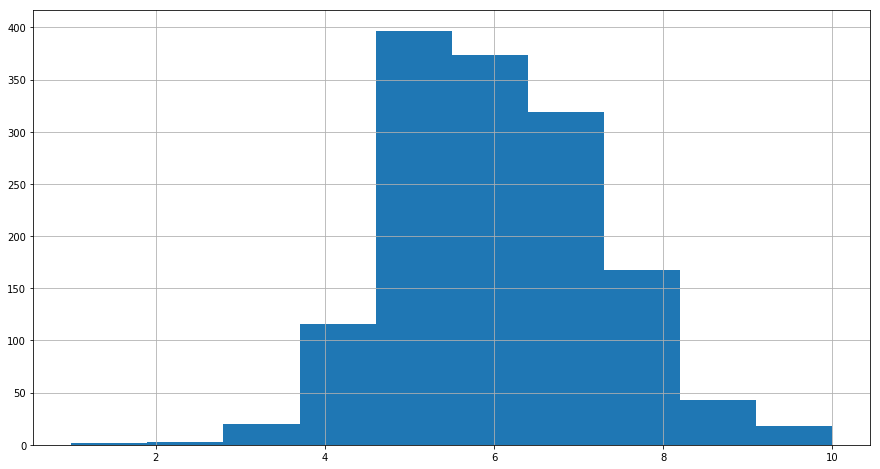

In [52]:
df_train.OverallQual.hist();

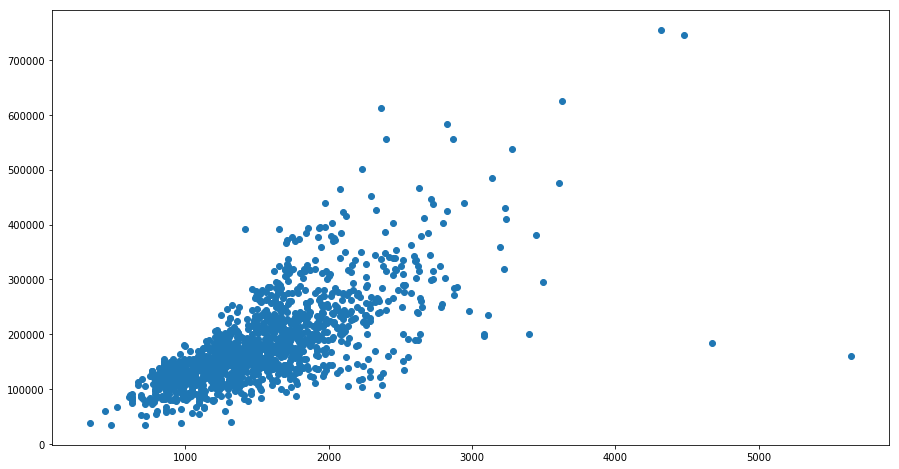

In [53]:
plt.scatter(x=df_train['GrLivArea'], y=df_train['SalePrice']);

In [54]:
df_train = df_train[df_train['GrLivArea'] < 4000]
df_test = df_test[df_test['GrLivArea'] < 4000]

In [55]:
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])
df_test['GrLivArea'] = np.log(df_test['GrLivArea'])

In [56]:
# GarageArea - correlation with target: 0.623431
df_train.GarageArea.head(5)

0    548
1    460
2    608
3    642
4    836
Name: GarageArea, dtype: int64

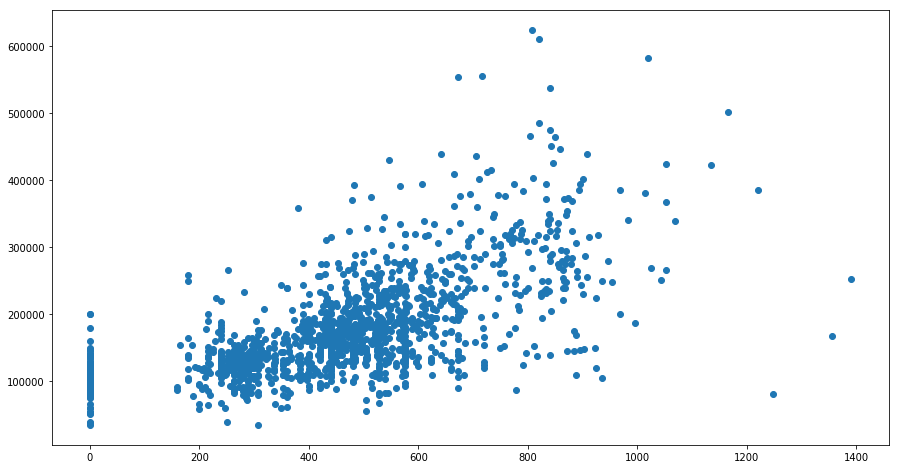

In [57]:
plt.scatter(x=df_train['GarageArea'], y=df_train['SalePrice']);

In [58]:
# GarageCars - correlation with target: 0.640409
df_train.GarageCars.head(5)

0    2
1    2
2    2
3    3
4    3
Name: GarageCars, dtype: int64

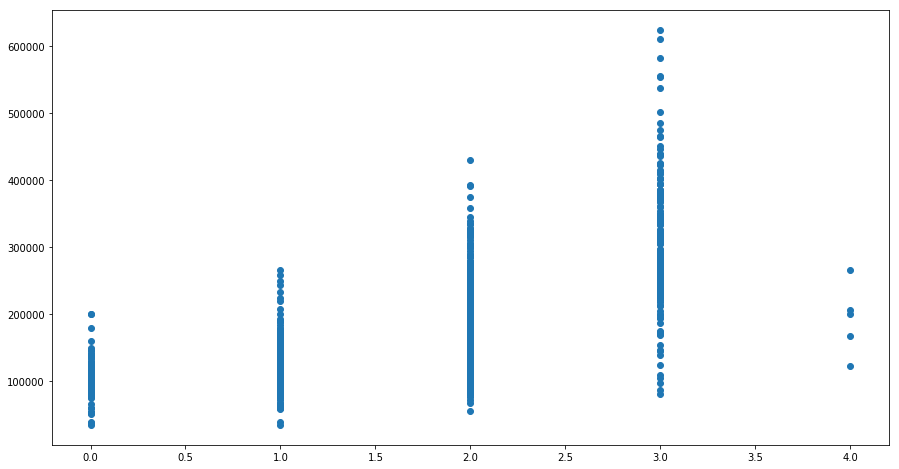

In [59]:
plt.scatter(x=df_train['GarageCars'], y=df_train['SalePrice']);

In [60]:
df_train[['GarageCars','GarageArea']].sample(10)

,GarageCars,GarageArea
246,1,440
736,2,400
194,1,352
1364,2,480
814,1,280
700,3,765
1370,1,338
1363,2,432
1265,2,506
3,3,642


In [61]:
df_train = df_train[df_train['GarageArea'] < 1200]
df_test = df_test[df_test['GarageArea'] < 1200]
#df_train = df_train[df_train['GarageCars'] <= 3]
#df_test = df_test[df_test['GarageCars'] <= 3]

In [62]:
df_train.TotalBsmtSF.sample(5)

187      660
440     3094
631     1554
26       900
1196     879
Name: TotalBsmtSF, dtype: int64

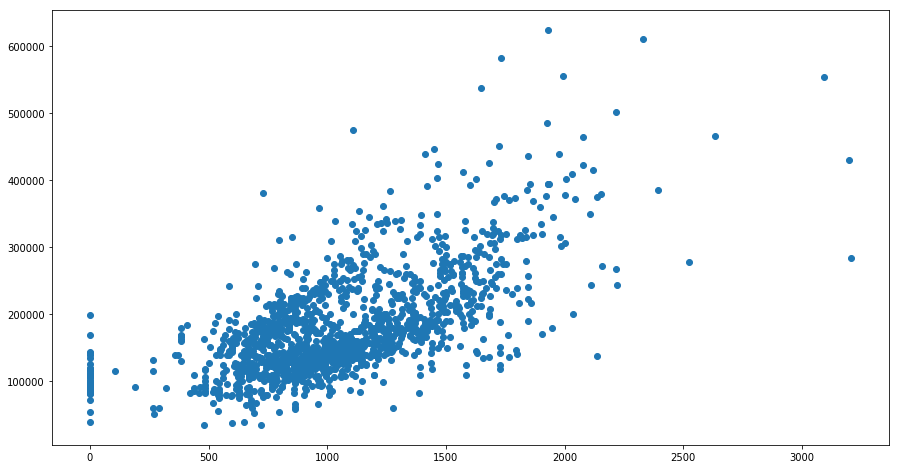

In [63]:
plt.scatter(x=df_train['TotalBsmtSF'], y=df_train['SalePrice']);

In [64]:
df_train = df_train[df_train['TotalBsmtSF'] < 3000]
df_test = df_test[df_test['TotalBsmtSF'] < 3000]

In [65]:
df_train.FullBath.sample(5)

1363    2
321     2
1051    2
1019    2
660     2
Name: FullBath, dtype: int64

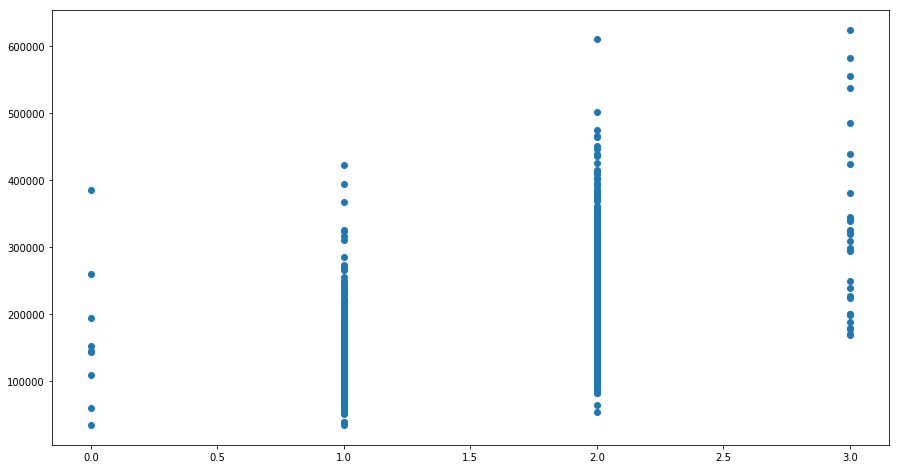

In [66]:
plt.scatter(x=df_train['FullBath'], y=df_train['SalePrice']);

In [67]:
df_train.YearBuilt.sample(5)

277     1951
1204    1975
987     2009
1273    1959
242     1900
Name: YearBuilt, dtype: int64

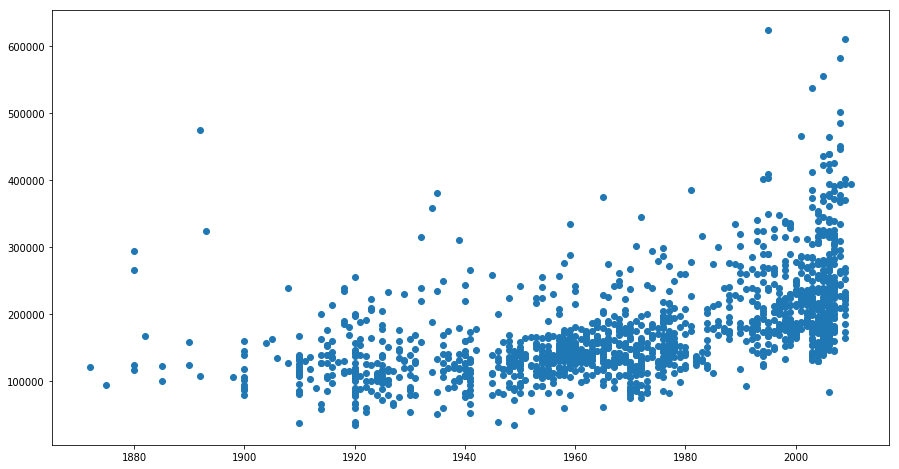

In [68]:
plt.scatter(x=df_train['YearBuilt'], y=df_train['SalePrice']);

In [69]:
# street 
df_train['Street'].value_counts()

Pave    1444
Grvl       5
Name: Street, dtype: int64

Street is a feature, which contains information about type of road access. It has two type: pave and gravel.

In [70]:
factorize(df_train, 'Street')
factorize(df_test, 'Street')

In [71]:
# sale condition
df_train['SaleCondition'].value_counts()

Normal     1192
Partial     121
Abnorml     100
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

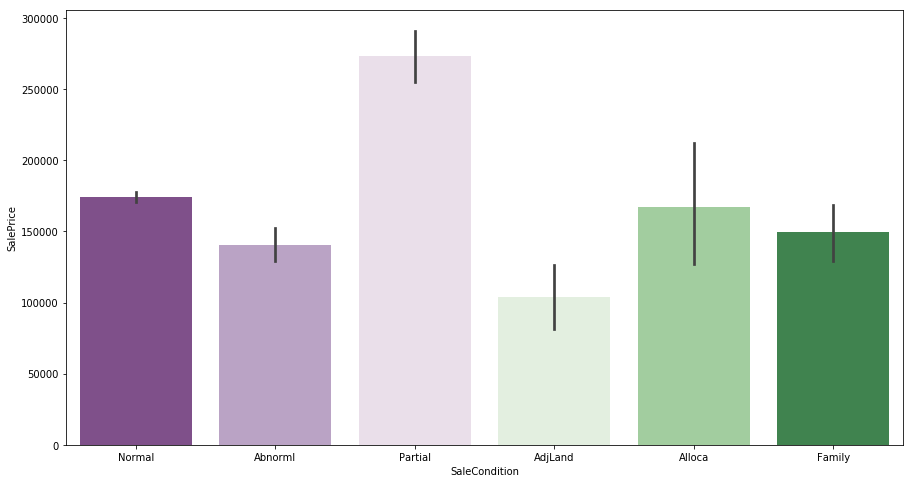

In [72]:
sns.barplot(x='SaleCondition', y='SalePrice', data=df_train, palette="PRGn");

In dataset usually occurs type of SaleCondition is Normal type. However we must see another dependence. Namely what effect the type has on the target variable. Supreme dependence has Partial variable. Other types have the some dependence on target.

In [73]:
df_train['SaleCondition'] = df_train['SaleCondition'].apply(lambda x: 1 if x == 'Partial' else 0)

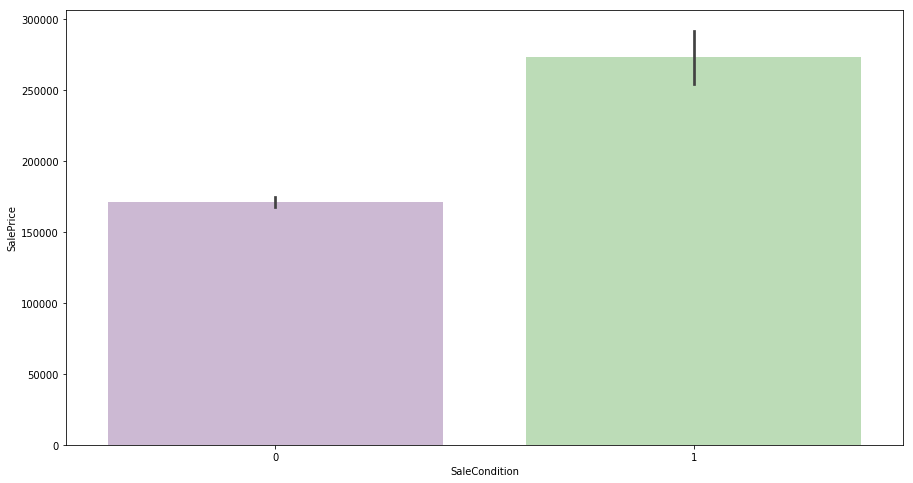

In [74]:
sns.barplot(x='SaleCondition', y='SalePrice', data=df_train, palette="PRGn");

In [75]:
df_train['SaleCondition'].value_counts()

0    1328
1     121
Name: SaleCondition, dtype: int64

In [76]:
df_train['BsmtQual'].value_counts()

TA      647
Gd      616
Ex      114
None     37
Fa       35
Name: BsmtQual, dtype: int64

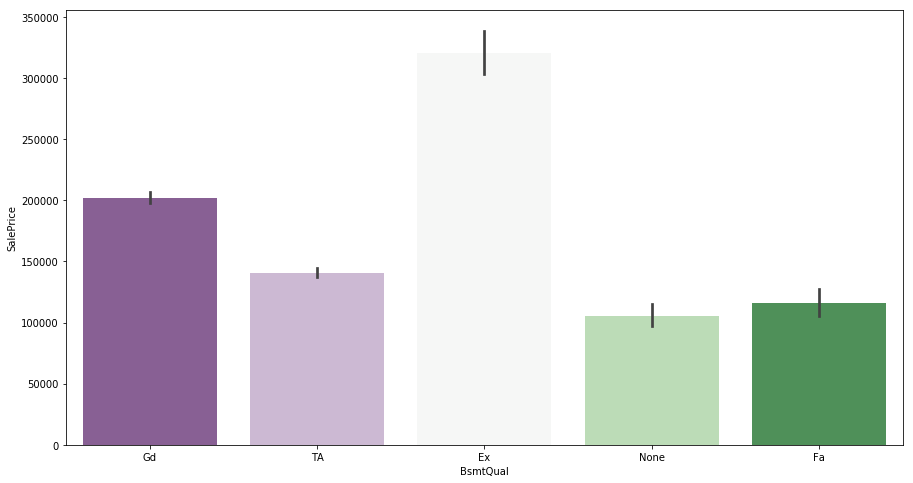

In [77]:
sns.barplot(x='BsmtQual', y='SalePrice', data=df_train, palette="PRGn");

In [78]:
df_train['BsmtQual'] = df_train['BsmtQual'].apply(lambda x: 1 if x == 'Ex' else 0)
df_test['BsmtQual'] = df_test['BsmtQual'].apply(lambda x: 1 if x == 'Ex' else 0)

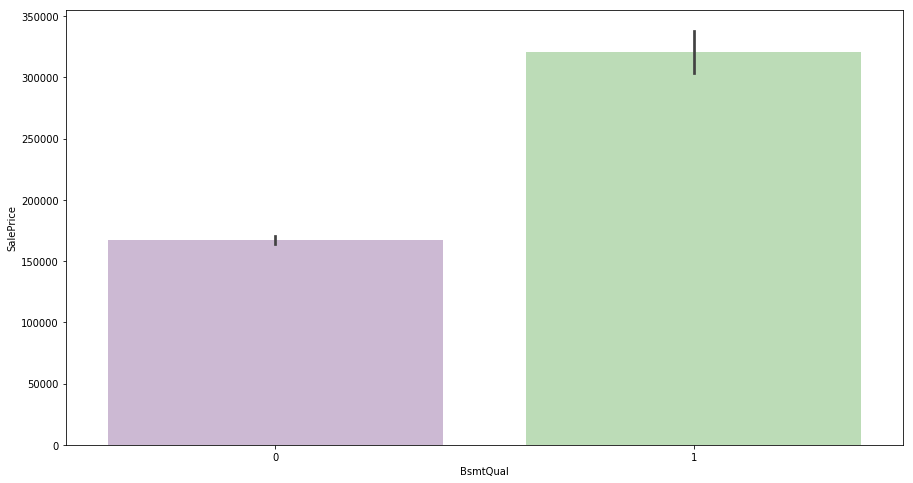

In [79]:
sns.barplot(x='BsmtQual', y='SalePrice', data=df_train, palette="PRGn");

In [80]:
df_train['KitchenQual'].value_counts()

TA    733
Gd    584
Ex     93
Fa     39
Name: KitchenQual, dtype: int64

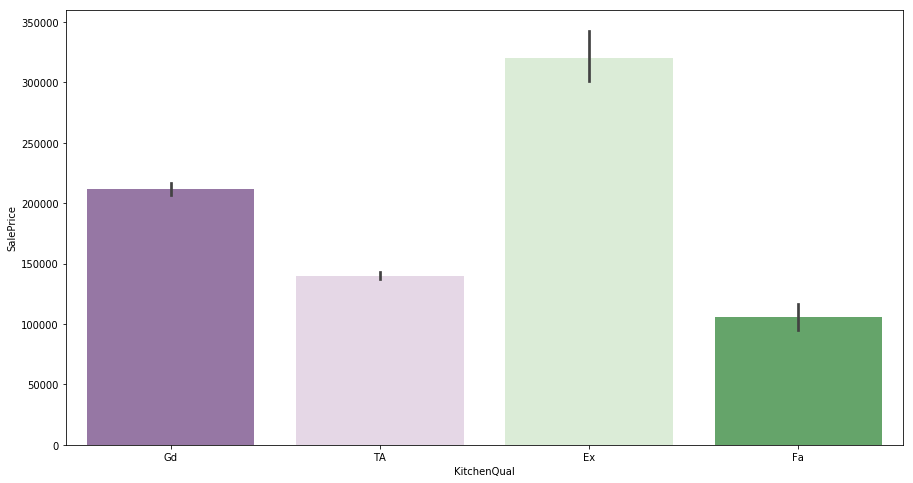

In [81]:
sns.barplot(x='KitchenQual', y='SalePrice', data=df_train, palette="PRGn");

In [82]:
df_train['KitchenQual'] = df_train['KitchenQual'].apply(lambda x: 1 if x == 'Ex' else 0)
df_test['KitchenQual'] = df_test['KitchenQual'].apply(lambda x: 1 if x == 'Ex' else 0)

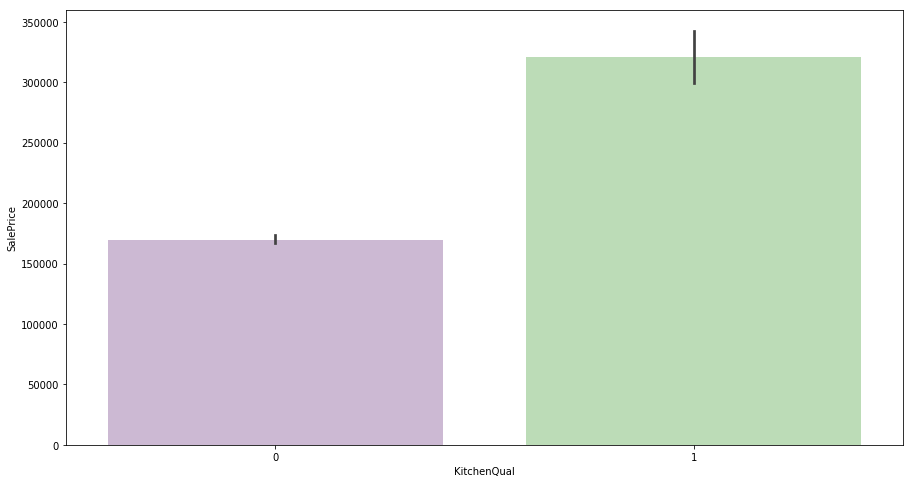

In [83]:
sns.barplot(x='KitchenQual', y='SalePrice', data=df_train, palette="PRGn");

In [84]:
df_train['CentralAir'].value_counts()

Y    1354
N      95
Name: CentralAir, dtype: int64

In [85]:
factorize(df_train, 'CentralAir')
factorize(df_test, 'CentralAir')

In [86]:
df_train['TotalSF'] = df_train['TotalBsmtSF'] + df_train['1stFlrSF'] + df_train['2ndFlrSF']
df_test['TotalSF'] = df_test['TotalBsmtSF'] + df_test['1stFlrSF'] + df_test['2ndFlrSF']

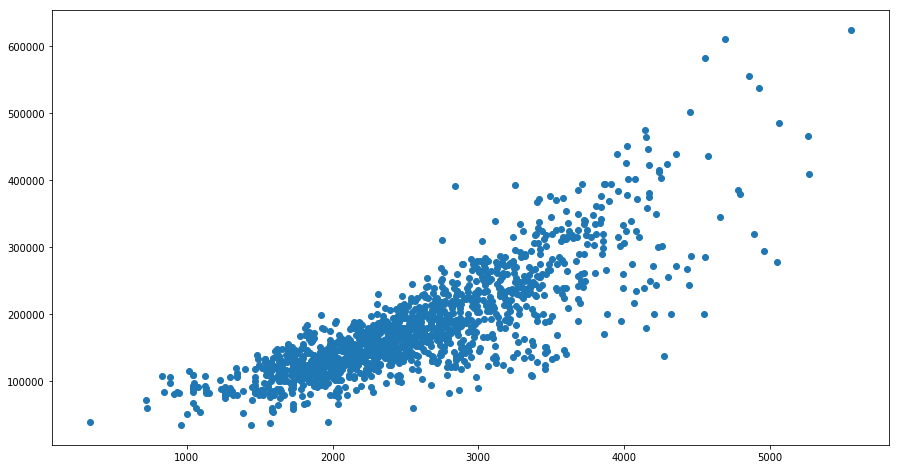

In [87]:
plt.scatter(x=df_train['TotalSF'], y=df_train['SalePrice']);

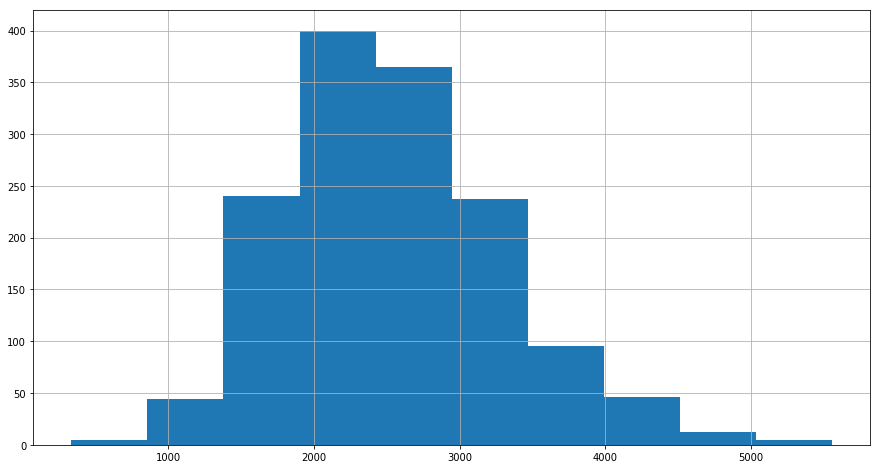

In [88]:
df_train.TotalSF.hist();

In [89]:
features = ['OverallQual', 'GrLivArea', 'GarageArea', 'FullBath', 'TotalSF', 'CentralAir_cat', 'KitchenQual_cat']

In [90]:
X = df_train[features].values
y = df_train['SalePrice_log']

In [91]:
model_train_predict(LinearRegression(), X, y)

split
fit
pred


0.222543471332284

In [92]:
feats = ['OverallQual', 'GrLivArea', 'GarageArea', 'FullBath', 'TotalSF', 'CentralAir_cat', 'KitchenQual_cat']

X = df_train[feats].values
y = df_train['SalePrice_log'].values

model = LinearRegression()

cv = KFold(n_splits=4)

scores = []
for train_idx, test_idx in cv.split(X):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    score = rmse(y_test, y_pred)
    scores.append(score)
    
    
print(np.mean(scores), np.std(scores))

0.22683090281369375 0.014941063778799769


In [93]:
def run_cv(model, X, y, folds=4, target_log=False, cv_type=KFold, success_metric=rmse):
    cv = cv_type(n_splits=folds)
    
    scores = []
    for train_idx, test_idx in cv.split(X):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        if target_log:
            y_train = np.log(y_train)

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        if target_log: 
            y_pred = np.exp(y_pred)
        y_pred[y_pred < 0] = 0

        score = success_metric(y_test, y_pred)
        scores.append(score)
        
    return np.mean(scores), np.std(scores)

In [94]:
run_cv(model, X, y, folds=3, target_log='SalePrice_log')

(0.22731824660965574, 0.006605233173319401)

In [95]:
def plot_learning_curve(model, title, X, y, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure(figsize=(12,8))
    plt.title(title)
    if ylim is not None:plt.ylim(*ylim)

    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    rmse_scorer = make_scorer(rmse)
    
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring=rmse_scorer)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False): 
split
fit
pred
CPU times: user 1.47 ms, sys: 2.69 ms, total: 4.16 ms
Wall time: 2.96 ms
0.22388828599314253



/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


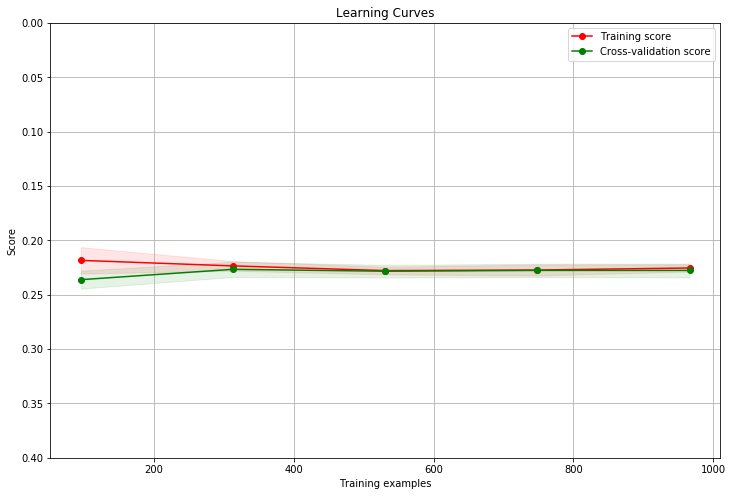

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'): 
split
fit
pred
CPU times: user 5.5 ms, sys: 0 ns, total: 5.5 ms
Wall time: 4.96 ms
0.3339376225646763



/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


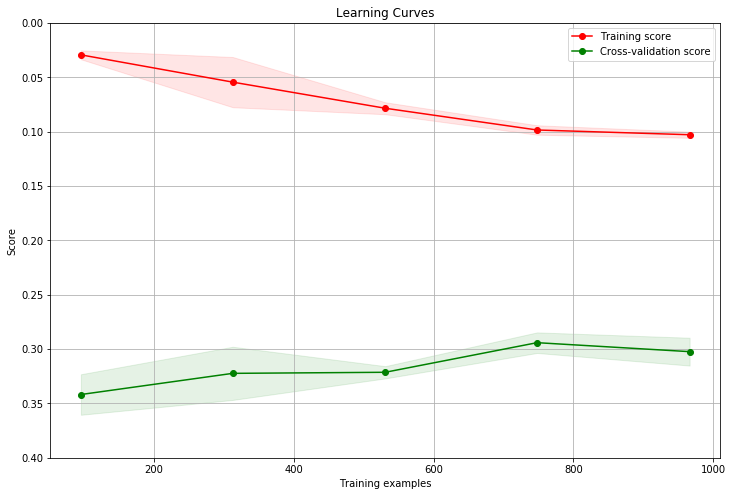

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False): 
split
fit
pred
CPU times: user 23 ms, sys: 0 ns, total: 23 ms
Wall time: 23.6 ms
0.25534284094336773



/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


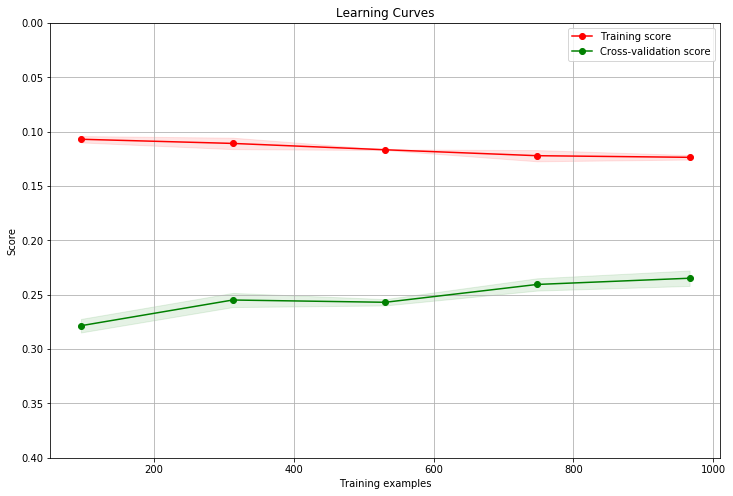

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=20,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False): 
split
fit
pred
CPU times: user 18.2 ms, sys: 1.17 ms, total: 19.4 ms
Wall time: 18.8 ms
0.23781332370846409



/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


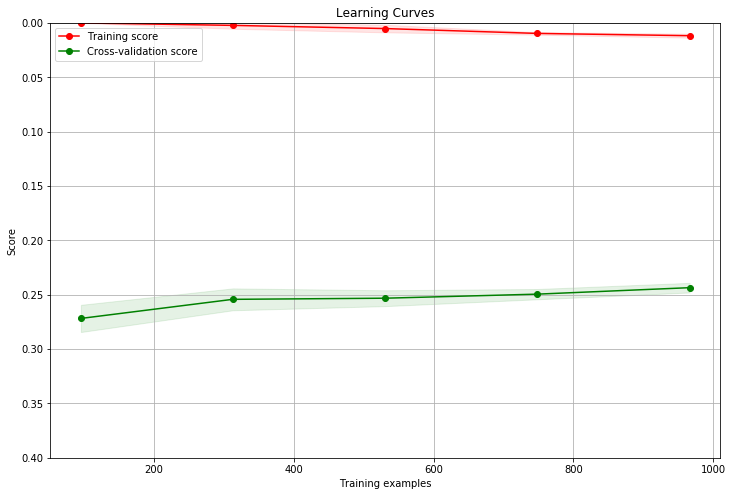

In [96]:
models = [
    LinearRegression(),
    DecisionTreeRegressor(max_depth=10),
    RandomForestRegressor(max_depth=10),
    ExtraTreesRegressor(max_depth=20)
]

for model in models:
    print(str(model) + ": ")
    %time score = model_train_predict(model, X, y)
    print(str(score) + "\n")
    plt = plot_learning_curve(model, "Learning Curves", X, y, ylim=(0.4, 0.0), n_jobs=4)
    plt.show()

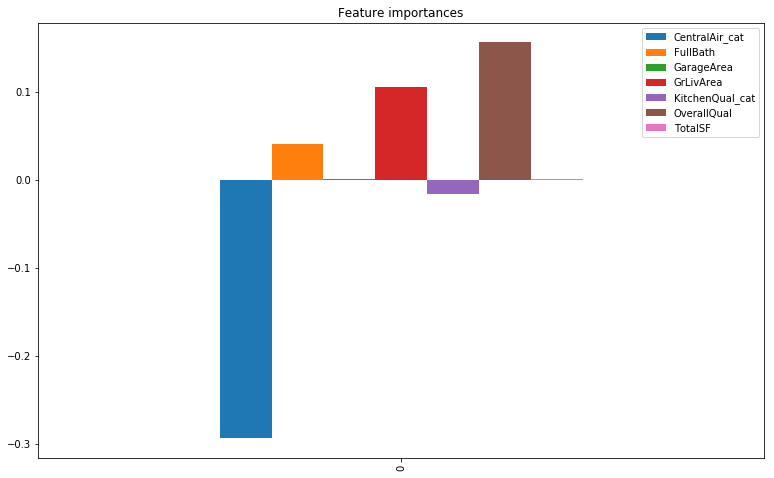

In [97]:
model = LinearRegression()
model.fit(X, y)

weights = list(model.coef_)

dict_feats = {label :weight for label, weight in zip(feats, weights) }
feats = pd.DataFrame([dict_feats])
feats.plot(kind='bar', figsize=(13, 8), title="Feature importances");

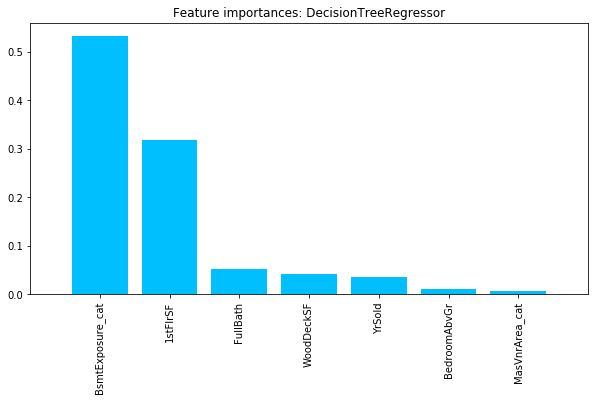

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


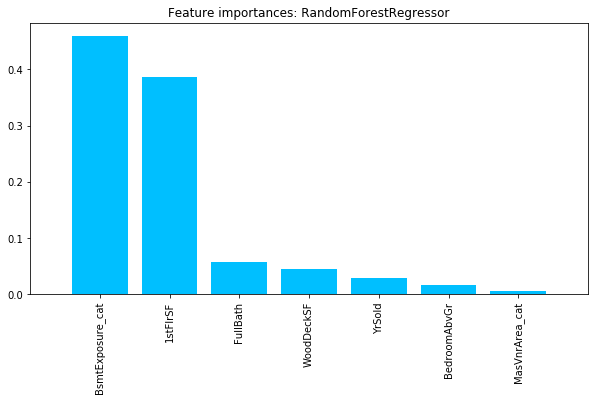

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


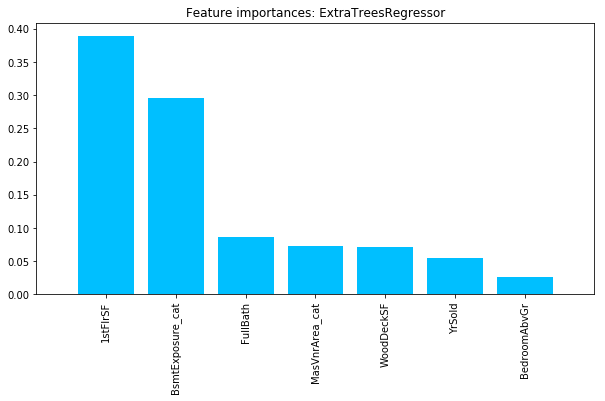

In [98]:
models = [
    DecisionTreeRegressor(max_depth=10),
    RandomForestRegressor(max_depth=10),
    ExtraTreesRegressor(max_depth=20)
]

for model in models:
    model.fit(X, y)
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(10, 5))
    plt.title('Feature importances: ' + str(model).split('(')[0])
    plt.bar(range(X.shape[1]), model.feature_importances_[indices],
           color = '#00bfff', align = 'center')
    plt.xticks(range(X.shape[1]), [ good_feats(df_train)[x] for x in indices])
    plt.xticks(rotation=90)
    plt.xlim([-1, X.shape[1]])
    plt.show()

In [99]:
feats = ['OverallQual', 'GrLivArea', 'GarageArea', 'FullBath', 'TotalSF', 'CentralAir_cat', 'KitchenQual_cat']
X = df_train[feats].values
y = df_train['SalePrice_log'].values

run_cv(xgb.XGBRegressor(), X, y, folds=4, target_log='SalePrice_log')

(0.22515905482996798, 0.013960141303621575)

In [100]:
X = df_train[feats].values
y = df_train['SalePrice_log'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    
def objective(space):    
    xgb_params = {
        'max_depth': int(space['max_depth']),
        'colsample_bytree': space['colsample_bytree'],
        'learning_rate': space['learning_rate'],
        'subsample': space['subsample'],
        'seed': int(space['seed']),
        'min_child_weight': int(space['min_child_weight']),
        'reg_alpha': space['reg_alpha'],
        'reg_lambda': space['reg_lambda'],
        'n_estimators': 150
    }
    
    model = xgb.XGBRegressor(**xgb_params)
    model.fit(X_train, y_train)
    means_score, std_score = run_cv(xgb.XGBRegressor(), X, y, target_log=True)

    print(means_score, std_score)
    
    print("SCORE: {0}".format(score))
    
    return{'loss':score, 'status': STATUS_OK }

space ={
    'max_depth': hp.quniform ('x_max_depth', 3, 8, 1),
    'colsample_bytree': hp.uniform ('x_colsample_bytree', 0.3, 0.7),
    'learning_rate': hp.uniform ('x_learning_rate', 0.1, 0.3), 
    'subsample': hp.uniform ('x_subsample', 0.3, 0.7),
    'seed': hp.quniform ('x_seed', 0, 10000, 50),
    'min_child_weight': hp.quniform ('x_min_child_weight', 1, 10, 1),
    'reg_alpha': hp.loguniform ('x_reg_alpha', 0., 0.1),
    'reg_lambda': hp.uniform ('x_reg_lambda', 0.9, 1.),
    'n_estimators': hp.quniform ('x_n_estimators', 50, 300, 10)
}

trials = Trials()
best_params = fmin(fn=objective,
            space=space,
            algo=partial(tpe.suggest, n_startup_jobs=1),
            max_evals=100,
            trials=trials)

print("The best params: ", best_params)

0.22515905482996798 0.013960141303621575
SCORE: 0.23781332370846409
0.22515905482996798 0.013960141303621575
SCORE: 0.23781332370846409
0.22515905482996798 0.013960141303621575
SCORE: 0.23781332370846409
0.22515905482996798 0.013960141303621575
SCORE: 0.23781332370846409
0.22515905482996798 0.013960141303621575
SCORE: 0.23781332370846409
0.22515905482996798 0.013960141303621575
SCORE: 0.23781332370846409
0.22515905482996798 0.013960141303621575
SCORE: 0.23781332370846409
0.22515905482996798 0.013960141303621575
SCORE: 0.23781332370846409
0.22515905482996798 0.013960141303621575
SCORE: 0.23781332370846409
0.22515905482996798 0.013960141303621575
SCORE: 0.23781332370846409
0.22515905482996798 0.013960141303621575
SCORE: 0.23781332370846409
0.22515905482996798 0.013960141303621575
SCORE: 0.23781332370846409
0.22515905482996798 0.013960141303621575
SCORE: 0.23781332370846409
0.22515905482996798 0.013960141303621575
SCORE: 0.23781332370846409
0.22515905482996798 0.013960141303621575
SCORE: 

In [101]:
X = df_test[features].values

df_test['SalePrice'] = model.predict(X)
df_test[ ['Id','SalePrice'] ].to_csv('../lr.csv', index=False)